# 淘宝用户行为分析
  **左右键切换页面*
                                                                                 
 ![jupyter](./behavior2.png)


**数据来源**

本数据集包含了2017年11月25日至2017年12月3日之间，有行为的约**一个亿**随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。

## （一）理解数据

In [1]:
#导入所需要的数据库
import pandas as pd
import numpy as np
import os
from  datetime import datetime

In [2]:
#使用pandas库，读取数据
userbehavior1 = pd.read_csv('C:/Users/10830/Desktop/用户行为分析/UserBehavior.csv' , header = None)
#查看数据信息，源数据为1亿×5列 的矩阵
userbehavior1.info

<bound method DataFrame.info of                 0        1        2   3           4
0               1  2268318  2520377  pv  1511544070
1               1  2333346  2520771  pv  1511561733
2               1  2576651   149192  pv  1511572885
3               1  3830808  4181361  pv  1511593493
4               1  4365585  2520377  pv  1511596146
...           ...      ...      ...  ..         ...
100150802  999999  4797808    11120  pv  1512293403
100150803  999999  4613472  4602841  pv  1512293766
100150804  999999  3647364  2304296  pv  1512293792
100150805  999999  1903801  2304296  pv  1512293827
100150806  999999  3696094  4602841  pv  1512293891

[100150807 rows x 5 columns]>

In [3]:
#总共有1亿多条记录，从中取500万条，并加上标题
userbehavior = userbehavior1.iloc[:5000000]

userbehavior.columns = ['user_id' , 'item_id' ,'category_id' ,'behavior' ,'timestamps']

userbehavior.info

<bound method DataFrame.info of          user_id  item_id  category_id behavior  timestamps
0              1  2268318      2520377       pv  1511544070
1              1  2333346      2520771       pv  1511561733
2              1  2576651       149192       pv  1511572885
3              1  3830808      4181361       pv  1511593493
4              1  4365585      2520377       pv  1511596146
...          ...      ...          ...      ...         ...
4999995   309818  5097964      3415753      fav  1511907910
4999996   309818  1527236      4397687       pv  1511934598
4999997   309818  4056652      3441583      buy  1511957405
4999998   309818  1461532      3102419       pv  1511959224
4999999   309818  4218902      4145813       pv  1511959412

[5000000 rows x 5 columns]>

In [4]:
userbehavior = userbehavior.copy()

## (二)数据清洗

In [5]:
#时间戳转换为时间
userbehavior['date_time'] = pd.to_datetime(userbehavior['timestamps'],unit='s',origin=pd.Timestamp('1970-01-01 08:00:00'))
  ##添加日期、时间
userbehavior['date'] = userbehavior['date_time'].dt.date

userbehavior['time'] = userbehavior['date_time'].dt.time

userbehavior['hour'] = userbehavior['date_time'].dt.hour

0-6 表示周一--到周日
#serbehavior['weekday'] = userbehavior['date_time'].dt.weekday

#删除多余的数据列
userbehavior= userbehavior.drop('timestamps',1)

userbehavior.head()

,user_id,item_id,category_id,behavior,date_time,date,time,hour
0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,01:21:10,1
1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,06:15:33,6
2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,09:21:25,9
3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15:04:53,15
4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15:49:06,15


In [6]:
#判断是否有缺失值
userbehavior.count()

#无数据缺失

user_id        5000000
item_id        5000000
category_id    5000000
behavior       5000000
date_time      5000000
date           5000000
time           5000000
hour           5000000
dtype: int64

In [7]:
#判断日期是否有异常
userbehavior['date'].value_counts()

#日期出现异常，源数据中只有2017年11月25日至2017年12月3日的数据

2017-12-02    695571
2017-12-03    688212
2017-12-01    543503
2017-11-26    531632
2017-11-30    521171
2017-11-25    513950
2017-11-29    510913
2017-11-27    499919
2017-11-28    492497
2017-11-24      2008
2017-11-23       235
2017-11-22        68
2017-11-03        64
2017-11-20        44
2017-11-19        38
2017-11-21        37
2017-11-18        23
2017-11-17        20
2018-08-28        16
2017-11-16        11
2017-12-04         8
2017-11-14         7
2017-11-11         7
2017-11-04         7
2017-11-13         7
2030-01-16         4
2017-11-15         4
2017-11-12         4
2017-12-06         3
2017-07-03         2
2017-11-02         2
2017-11-10         2
2017-09-16         2
2017-11-06         1
2017-11-05         1
2017-10-10         1
2037-04-09         1
2017-09-11         1
2015-02-06         1
1970-01-01         1
2017-10-07         1
2017-10-31         1
Name: date, dtype: int64

In [8]:
#定义开始日期，结束日期
s_date = pd.to_datetime('2017-11-24')
e_date = pd.to_datetime('2017-12-04')

#只保留正常范围内的数据

userbehavior = userbehavior[(userbehavior['date'] > s_date) & (userbehavior['date'] < e_date)  ]

#再次判断日期是否还有异常
userbehavior['date'].value_counts()

2017-12-02    695571
2017-12-03    688212
2017-12-01    543503
2017-11-26    531632
2017-11-30    521171
2017-11-25    513950
2017-11-29    510913
2017-11-27    499919
2017-11-28    492497
Name: date, dtype: int64

In [9]:
userbehavior.head(5)

,user_id,item_id,category_id,behavior,date_time,date,time,hour
0,1,2268318,2520377,pv,2017-11-25 01:21:10,2017-11-25,01:21:10,1
1,1,2333346,2520771,pv,2017-11-25 06:15:33,2017-11-25,06:15:33,6
2,1,2576651,149192,pv,2017-11-25 09:21:25,2017-11-25,09:21:25,9
3,1,3830808,4181361,pv,2017-11-25 15:04:53,2017-11-25,15:04:53,15
4,1,4365585,2520377,pv,2017-11-25 15:49:06,2017-11-25,15:49:06,15


userbehavior.to_csv('D:/study/behavior/Result1.csv')

## (三)构建模型 ，分析数据

###  1、用户整体情况分析

In [10]:
#用户各行为的整体点击情况
userbehavior['behavior'].value_counts()

pv      4472600
cart     279512
fav      145125
buy      100131
Name: behavior, dtype: int64

In [11]:
# 用户数量（UV）
UV = len(userbehavior['user_id'].unique())
UV

48984

In [12]:
#用户浏览量（PV）
PV = userbehavior[userbehavior['behavior'] == 'pv']['behavior'].value_counts()
PV

pv    4472600
Name: behavior, dtype: int64

In [13]:
#平均访问量  每个用户平均访问量72个页面
PV/UV

pv    91.307366
Name: behavior, dtype: float64

In [14]:
#跳失率（只有点击行为的用户/总用户数）
stay = ['fav' ,'buy' , 'cart']
lost = UV - len(userbehavior[userbehavior['behavior'].isin(stay)]['user_id'].unique())
lost

2871

In [15]:
#8%的跳失率，不高，商品对于用户有一定的吸引力
lost_rate = lost / UV
lost_rate

0.0586109750122489

In [16]:
#用户每天的访问情况
userbehavior[userbehavior['behavior'] == 'pv']['behavior'].groupby(userbehavior['date']).count()

date
2017-11-25    461171
2017-11-26    476245
2017-11-27    446740
2017-11-28    440340
2017-11-29    456976
2017-11-30    467215
2017-12-01    486101
2017-12-02    622231
2017-12-03    615581
Name: behavior, dtype: int64

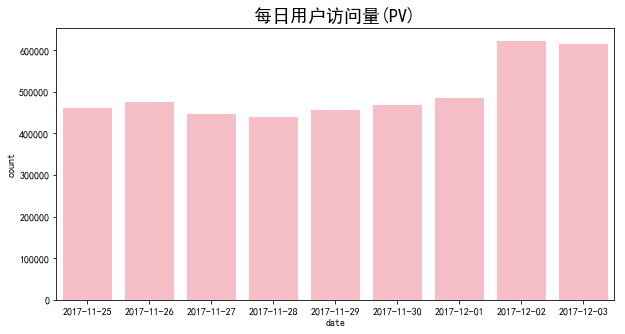

In [17]:
#可视化展示
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
plt.rcParams['font.sans-serif'] = ['simhei']  #正常显示中文
plt.figure(figsize = (10,5))  #画布大小
plt.tick_params(labelsize=10)  #标签字体大小
plt.title('每日用户访问量(PV)',fontsize =18 )
sns.countplot(x = 'date',data=userbehavior[userbehavior['behavior'] == 'pv'] , color ='lightpink')

In [18]:
#每日用户数（UV）
userbehavior1 = userbehavior.drop_duplicates(['user_id' ,'date'])  #去重
userbehavior1['user_id'].groupby(userbehavior1['date']).count()

date
2017-11-25    34903
2017-11-26    35466
2017-11-27    35138
2017-11-28    35216
2017-11-29    35768
2017-11-30    36416
2017-12-01    36719
2017-12-02    48092
2017-12-03    47966
Name: user_id, dtype: int64

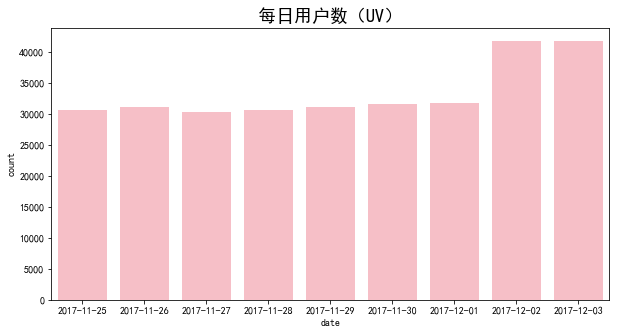

In [19]:
#每日访客量可视化展示
plt.rcParams['font.sans-serif'] = ['simhei']
plt.figure(figsize = (10,5))  #画布大小
plt.tick_params(labelsize=10)  #标签字体大小
plt.title('每日用户数（UV）',fontsize =18 )
sns.countplot(x = 'date',data=userbehavior1[userbehavior1['behavior'] == 'pv'] , color ='lightpink')

In [20]:
#每个时段的用户数（UV）
userbehavior1 =  userbehavior.drop_duplicates(['user_id' ,'hour'])  #去重
userbehavior1['user_id'].groupby(userbehavior1['hour']).count()

hour
0     15616
1      8050
2      4781
3      3424
4      3068
5      4082
6      8808
7     16377
8     22057
9     25856
10    28611
11    29178
12    29516
13    30095
14    29410
15    30014
16    29668
17    28912
18    28909
19    30978
20    33039
21    33835
22    32146
23    25330
Name: user_id, dtype: int64

In [21]:
#每个时段访问量（PV）
userbehavior[userbehavior['behavior']=='pv']['behavior'].groupby(userbehavior['hour']).count()

hour
0     149884
1      68467
2      37536
3      26422
4      22544
5      28039
6      60113
7     111536
8     154485
9     188798
10    216260
11    210669
12    213208
13    234846
14    230455
15    239338
16    230376
17    208410
18    216937
19    271283
20    329245
21    376778
22    368819
23    278152
Name: behavior, dtype: int64

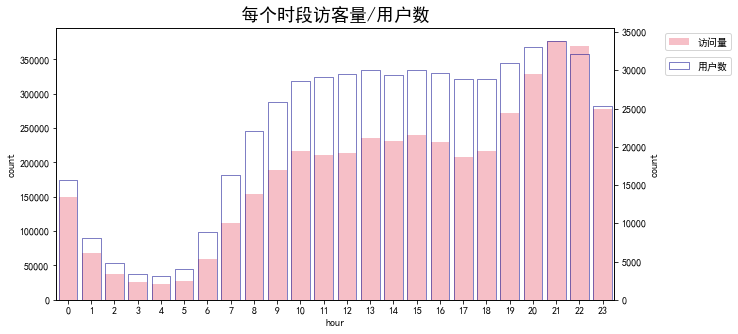

In [22]:
#可视化
plt.rcParams['font.sans-serif'] = ['simhei']
plt.figure(figsize = (10,5))  #画布大小
plt.tick_params(labelsize=10)  #标签字体大小
plt.title('每个时段访客量/用户数',fontsize =18 )
ax1 = sns.countplot(x='hour',data=userbehavior[userbehavior['behavior']=='pv'],color="lightpink",label ='访问量')
plt.legend(loc='center',bbox_to_anchor=(1.15,0.95))
ax2 = ax1.twinx() 
sns.countplot(x='hour',data = userbehavior1,facecolor=(0, 0, 0, 0),linewidth=0.5,edgecolor='darkblue', ax=ax2,label ='用户数')
plt.legend(loc='center',bbox_to_anchor=(1.15,0.86))

- 用户数与访问量在1-6时（大多数人处于睡眠休息阶段时)都较低
- 19 - 22时达到访问量高峰，猜测是下班后浏览购物网站放松
- 在10-18时用户数比较高，也很稳定，但该阶段访问量不高，可能是用户上班休息时间打开了淘宝但没时间大量浏览和购买商品，晚上是用户的访问高峰期

In [23]:
userbehavior[userbehavior['behavior']=='buy']['behavior'].groupby(userbehavior['hour']).count()

hour
0     2916
1     1101
2      603
3      302
4      328
5      380
6      922
7     1845
8     3186
9     4775
10    6383
11    6185
12    5883
13    6225
14    5981
15    6102
16    5756
17    5156
18    4703
19    5680
20    6743
21    7194
22    6839
23    4943
Name: behavior, dtype: int64

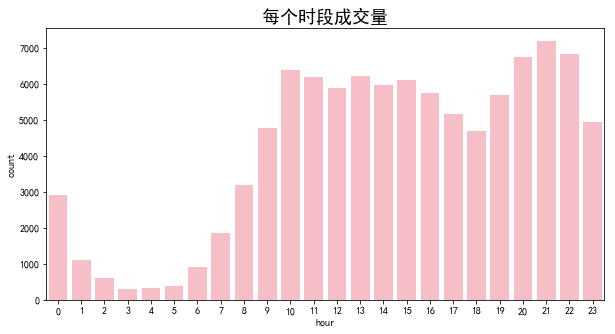

In [24]:
#可视化
plt.figure(figsize=(10, 5))#调整画布大小
plt.tick_params(labelsize=10)#调整标签字体大小
plt.title('每个时段成交量',fontsize =18 )
sns.countplot(x='hour',data=userbehavior[userbehavior['behavior']=='buy'],color="lightpink")

#10点-16点、20点-22点两个时间段的成交量最高

###  2、商品购买情况

In [25]:
#不同日期成交量
userbehavior[userbehavior['behavior']=='buy']['behavior'].groupby(userbehavior['date']).count()

date
2017-11-25     9890
2017-11-26    10092
2017-11-27    11088
2017-11-28    10562
2017-11-29    11145
2017-11-30    11007
2017-12-01    10509
2017-12-02    12885
2017-12-03    12953
Name: behavior, dtype: int64

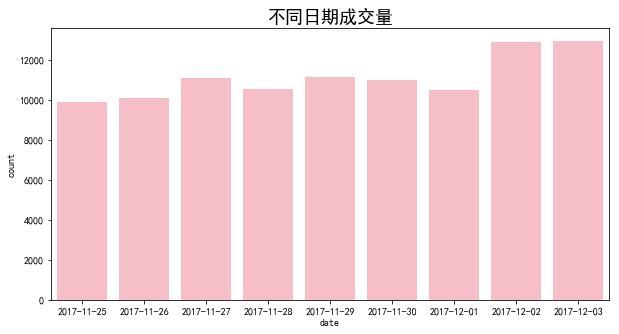

In [26]:
plt.figure(figsize=(10, 5))#调整画布大小
plt.tick_params(labelsize=10)#调整标签字体大小
plt.title('不同日期成交量',fontsize =18 )
sns.countplot(x='date',data=userbehavior[userbehavior['behavior']=='buy'],color="lightpink",order = 
              ['2017-11-25','2017-11-26','2017-11-27','2017-11-28','2017-11-29','2017-11-30',
               '2017-12-01','2017-12-02','2017-12-03'])

- 2017年12月3日和2017年12月2日成交量较高，刚是周六和周日。周末人们空闲时间较多，网购下单量更高。

In [27]:
#人均购买次数
len(userbehavior[userbehavior['behavior']=='buy'])/len(userbehavior[userbehavior['behavior']=='buy']['user_id'].unique())

#人均购买次数为3次，次数较高

3.0082016463378

##### 复购率 = 购买2次及以上用户数/总购买用户数


In [28]:
#购买2次以上用户数计算
two = userbehavior[userbehavior['behavior']=='buy'].groupby('user_id').count()>1
rebuy = two[two['behavior'] == True].index
len(rebuy)

21892

In [29]:
#复购率
len(rebuy)/len(userbehavior[userbehavior['behavior']=='buy']['user_id'].unique())

0.6576939253740312

In [30]:
#重复被购买得最多次的商品
userbehavior[userbehavior['behavior']=='buy']['item_id'].value_counts().head(10)

3122135    71
3031354    41
2964774    35
1116492    31
257772     30
1415828    30
1910706    29
2560262    28
1034594    27
1042152    27
Name: item_id, dtype: int64

- 对于受欢迎的商品，可将其作为主打商品进行宣称

In [31]:
#重复购买次数最多的客户
userbehavior[userbehavior['behavior']=='buy']['user_id'].value_counts().head(10)

234304     84
107932     72
122504     69
128379     65
190873     61
242650     61
1008380    57
165222     51
140047     47
263777     45
Name: user_id, dtype: int64

- 对于忠实的用户可开发用户信息库，建立完善的用户资料库，记录客户购物情况。
- 引导其中非会员用户成为会员用户，定期予以激励刺激

###  3、用户行为转化漏斗分析

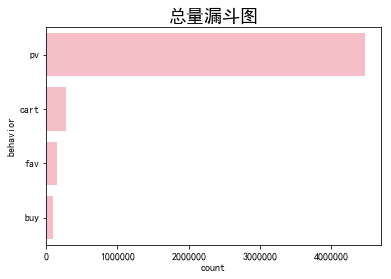

In [32]:
plt.title('总量漏斗图',fontsize =18 )
sns.countplot(y='behavior',data = userbehavior,color="lightpink",order=['pv','cart','fav','buy'])

In [33]:
userbehavior['behavior'].value_counts()

pv      4472600
cart     279512
fav      145125
buy      100131
Name: behavior, dtype: int64

In [34]:
pv = len(userbehavior[userbehavior['behavior']=='pv'])
pv

4472600

In [35]:
buy = len(userbehavior[userbehavior['behavior']=='buy'])
buy

100131

In [36]:
 buy/pv

0.022387649242051604

- 流失率为2.2%，用户在浏览商品详情页后出现了大量的流失。

#加入购物车和收藏商品并没有行为的先后性，也就是说，购物路线可以有两条：
- 第一条线路：浏览—加入购物车—购买
- 第二条线路：浏览—添加收藏—购买

(1)按照线路一来购买
 - 购物车转化率=加入购物车后购买的用户数/加入购物车的用户数

In [37]:
userbehavior2 = userbehavior[userbehavior['behavior']=='cart'] #加购数据
userbehavior3 = userbehavior[userbehavior['behavior']=='buy']#购买数据
userbehavior4 = pd.merge(userbehavior2,userbehavior3,on=['user_id','item_id','category_id'])#同一用户同一商品既加购又购买数据
userbehavior4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20225 entries, 0 to 20224
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      20225 non-null  int64         
 1   item_id      20225 non-null  int64         
 2   category_id  20225 non-null  int64         
 3   behavior_x   20225 non-null  object        
 4   date_time_x  20225 non-null  datetime64[ns]
 5   date_x       20225 non-null  object        
 6   time_x       20225 non-null  object        
 7   hour_x       20225 non-null  int64         
 8   behavior_y   20225 non-null  object        
 9   date_time_y  20225 non-null  datetime64[ns]
 10  date_y       20225 non-null  object        
 11  time_y       20225 non-null  object        
 12  hour_y       20225 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 2.2+ MB


In [38]:
len(userbehavior4['user_id'].unique())#既加购又购买的数据

11552

In [39]:
userbehavior5 = userbehavior4[userbehavior4['date_x'] < userbehavior4['date_y']]#同一用户同一商品先加购再购买数据
#加入购物车后购买的用户数
cart_buy = len(userbehavior5['user_id'].unique())
cart_buy

8106

In [40]:
#加入购物车的用户数
cart = len(userbehavior[userbehavior['behavior']=='cart']['user_id'].unique())
cart

36906

In [41]:
cart_buy/cart

0.21963908307592261

加入购物车的用户中，有22%会进行购买。

用户加入购物车后没有购买原因可能有：

- 加入购物车是为了与不同店铺的同种产品进行比价
- 为了凑单，进行满减
- 先放着，过几天再购买
- 等活动优惠

In [42]:
#用户浏览到加入购物车
userbehavior6 = pd.merge(userbehavior[userbehavior['behavior']=='pv'],userbehavior[userbehavior['behavior']=='cart'],
               on=['user_id','item_id','category_id'])#同一用户同一商品既浏览又加购数据
userbehavior6 = userbehavior6[userbehavior6['date_x'] < userbehavior6['date_y']]#同一用户同一商品先浏览再加购数据
pv_cart = len(userbehavior6['user_id'].unique())/len(userbehavior[userbehavior['behavior']=='pv']['user_id'].unique())#用户浏览加入购物车的转化率
pv_cart 

0.21225042023697266

- 用户浏览到加入购物车的转化率约为21.22%

(2)浏览—加入购物车转化率
 - 购物车转化率=加入购物车后购买的用户数/加入购物车的用户数

In [43]:
#收藏-购买
userbehavior7 = pd.merge(userbehavior[userbehavior['behavior']=='fav'],userbehavior[userbehavior['behavior']=='buy'],
               on = ['user_id','item_id','category_id'])#同一用户同一商品既收藏又购买数据
userbehavior7 = userbehavior7[userbehavior7['date_x'] < userbehavior7['date_y']]#同一用户同一商品先浏览再加购数据
fav_buy = len(userbehavior7['user_id'].unique())/len(userbehavior[userbehavior['behavior']=='fav']['user_id'].unique())#用户购买收藏的转化率
fav_buy 

0.09523320847657653

- 9.5%的收藏转换为了购买量

In [44]:
#浏览-收藏
userbehavior8 = pd.merge(userbehavior[userbehavior['behavior']=='pv'],userbehavior[userbehavior['behavior']=='fav'],
               on = ['user_id','item_id','category_id'])#同一用户同一商品既浏览又收藏数据
userbehavior8 =userbehavior8[userbehavior8['date_x'] < userbehavior8['date_y']]#同一用户同一商品先浏览再收藏数据
pv_fav = len(userbehavior8['user_id'].unique())/len(userbehavior[userbehavior['behavior']=='pv']['user_id'].unique())#用户浏览加入收藏的转化率
pv_fav

0.08820876552826862

- 8.9%的浏览转换为了收藏

In [45]:
print('\n','路线一：' ,'\n','用户点击后收藏占比：{:.2f}%'.format(pv_fav*100),'\n' ,
      '用户收藏后购买占比：{:.2f}%'.format(fav_buy*100),'\n' ,'路线二：' ,'\n',
      '用户点击后加购物车占比：{:.2f}%'.format(pv_cart*100),'\n' ,
     '用户加购物车后购买占比：{:.2f}%'.format(cart_buy/cart*100))


 路线一： 
 用户点击后收藏占比：8.82% 
 用户收藏后购买占比：9.52% 
 路线二： 
 用户点击后加购物车占比：21.23% 
 用户加购物车后购买占比：21.96%


- 用户在浏览后，相对于收藏行为(8.82%)，会更倾向于添加到购物车(21.23%)。而且购物车转化率为21.96%，收藏转化率为9.52%，购物车转化率比收藏转化率高，也就是说，用户更偏向于购物车购买。

推测原因：
<p> 
    加入购物车后可以直接下单购买，而加入收藏后并没有可以下单的页面，如果需要购买必须重新点击商品进入详情页才能下单，多了一个步骤，所以，在这个步骤里可能用户就流失了部分。

### 4、参照RFM模型，对用户进行分类找出有价值的用户

#### RFM模型是衡量客户价值和客户创利能力的重要工具。该模型通过客户的最近交易行为（Recency）、交易频率（Frequency）以及交易金额（Monetary）三项指标来描述该客户的价值状况。一般来说，会将这三项指标分成几个区间进行评分，通过计算评分找到有价值的用户，并对用户进行分类。
- 最近一次消费(Recency)：是指最近一次消费距离上一次消费之间的时间长短。它反映了客户对产品的态度以及对品牌价值的信任度，它关乎消费者的存留状况。
- 消费频率(Frequency)：是指某个特定时间内消费的次数。它直接反映了客户的忠诚度，消费频率越高，忠诚度就越高；忠诚度越高的客户数量越多，公司的竞争优势越强，市场份额越大。
- 消费金额(Monetary)：是指一定时间内消费某产品金额。它反映的是客户的价值，价值越高，给公司创造的利益就更大。
因为数据源里没有金额相关的信息，所以只通过R和F来对客户价值进行评分。

#### R(Recency)最近的购买行为：
数据集里时间范围是从11月25到12月3日，我将11月25日，设为参数对照日期，即以距离11月25日的天数划分区间，其中0-2天，3-4天，5-6天，7-8天，分别对应为1-4分

In [46]:
import time

userbehavior3 = userbehavior[userbehavior['behavior']=='buy'].copy() #加购数据 
start = pd.to_datetime(userbehavior3['date'])
end =  pd.to_datetime('2017-11-25')
userbehavior3 ['buy_days'] = (start-end)/pd.Timedelta(1, 'D')#购买日期离201 年11月25日的天数

userbehavior3.head()

,user_id,item_id,category_id,behavior,date_time,date,time,hour,buy_days
71,100,1603476,2951233,buy,2017-11-25 11:18:28,2017-11-25,11:18:28,11,0.0
73,100,2971043,4869428,buy,2017-11-25 21:45:49,2017-11-25,21:45:49,21,0.0
100,100,598929,2429887,buy,2017-11-27 13:10:58,2017-11-27,13:10:58,13,2.0
119,100,1046201,3002561,buy,2017-11-27 15:21:38,2017-11-27,15:21:38,15,2.0
125,100,1606258,4098232,buy,2017-11-27 21:39:00,2017-11-27,21:39:00,21,2.0


In [47]:
#购买天数与R评分的对应关系函数
def R(n):
    if n in [0,1,2]:
        return 1
    elif n in [3,4]:
        return 2
    elif n in[5,6]:
        return 3
    else:
        return 4
userbehavior3['R'] = userbehavior3['buy_days'].map(lambda x: R(x))
userbehavior3.head(20)#查看前20条数据以检验

,user_id,item_id,category_id,behavior,date_time,date,time,hour,buy_days,R
71,100,1603476,2951233,buy,2017-11-25 11:18:28,2017-11-25,11:18:28,11,0.0,1
73,100,2971043,4869428,buy,2017-11-25 21:45:49,2017-11-25,21:45:49,21,0.0,1
100,100,598929,2429887,buy,2017-11-27 13:10:58,2017-11-27,13:10:58,13,2.0,1
119,100,1046201,3002561,buy,2017-11-27 15:21:38,2017-11-27,15:21:38,15,2.0,1
125,100,1606258,4098232,buy,2017-11-27 21:39:00,2017-11-27,21:39:00,21,2.0,1
126,100,4840649,1029459,buy,2017-11-27 21:42:10,2017-11-27,21:42:10,21,2.0,1
128,100,251391,3738615,buy,2017-11-27 21:53:02,2017-11-27,21:53:02,21,2.0,1
136,100,4075065,2881542,buy,2017-11-28 09:51:17,2017-11-28,09:51:17,9,3.0,2
266,1000001,4088463,174239,buy,2017-12-03 09:22:53,2017-12-03,09:22:53,9,8.0,4
398,1000011,3991727,3108044,buy,2017-11-25 09:06:44,2017-11-25,09:06:44,9,0.0,1


In [48]:
#不同R评分的用户数统计：
df = userbehavior3.drop_duplicates(['user_id'])
df['R'].value_counts()

1    16188
2     6908
3     5303
4     4887
Name: R, dtype: int64

#### F(Frequency）购买频率：
从上面对复购用户的分析中，我们也得知，有购买行为的用户，购买频率最高的能达到84次。所以，我们将1-84从低到高，划分为4个档次。1-21，22-42，43-63，64-84分别对应为1-4分。

In [49]:
def F(n):  #购买次数与F评分的对应关系函数
    if 1 <= n <=21:
        return 1
    elif 22 <= n <= 42:
        return 2
    elif 43 <= n <= 63:
        return 3
    else:
        return 4
    
    
rebuy = pd.DataFrame(userbehavior3['user_id'].value_counts())  #用户购买次数分类计数并划为dataframe结构
rebuy.columns = ['re_user_id']  #更改列名
rebuy['user_id'] = rebuy.index   #重建用户ID列
rebuy

,re_user_id,user_id
234304,84,234304
107932,72,107932
122504,69,122504
128379,65,128379
190873,61,190873
...,...,...
215625,1,215625
24893,1,24893
217610,1,217610
172532,1,172532


In [50]:
userbehavior3 = pd.merge(rebuy , userbehavior3 ,on='user_id')
userbehavior3['F']= userbehavior3['re_user_id'].map(lambda x: F(x))
userbehavior3.head()

,re_user_id,user_id,item_id,category_id,behavior,date_time,date,time,hour,buy_days,R,F
0,84,234304,2250064,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4
1,84,234304,2430157,767106,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4
2,84,234304,2779526,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4
3,84,234304,3998272,4565874,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4
4,84,234304,875095,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4


In [51]:
#不同F评分的用户数统计：
df = userbehavior3.drop_duplicates(['user_id'])
df['F'].value_counts()

1    33202
2       73
3        7
4        4
Name: F, dtype: int64

#### 通过上面两个步骤，从两个维度：最近购买时间及购买频率，分别给用户进行了评分。接下来用这两项的每一项平均值作为判断高于还是低于，比如重要价值用户，必须是两项的分值都比平均值要高，才能作为重要价值的用户。

下面对用户进行分类

- R高F高：重要价值用户（最近购买且购买频率高）

- R高F低：重要保持用户（最近购买且购买频率低）

- R低F高：重要发展用户（很久没买了购买频率高）

- R低F低：一般价值用户（很久没买了购买频率低）

In [52]:
r_mean = userbehavior3['R'].mean()#R的平均值
r_mean

2.42066892370994

In [53]:
f_mean = userbehavior3['F'].mean() #F的平均值
f_mean

1.035813084858835

In [54]:
userbehavior3['用户分类'] = np.select([(userbehavior3['R'] > r_mean ) & (userbehavior3['F'] > f_mean ),
                                   (userbehavior3['R'] > r_mean ) & (userbehavior3['F'] <= f_mean ),
                                   (userbehavior3['R'] < r_mean ) & (userbehavior3['F'] > f_mean),
                                   (userbehavior3['R'] < r_mean) & (userbehavior3['F'] <= f_mean)],
                                  ['重要价值用户','重要保持用户','重要发展用户','一般价值用户'])
userbehavior3.head()

,re_user_id,user_id,item_id,category_id,behavior,date_time,date,time,hour,buy_days,R,F,用户分类
0,84,234304,2250064,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4,重要发展用户
1,84,234304,2430157,767106,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4,重要发展用户
2,84,234304,2779526,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4,重要发展用户
3,84,234304,3998272,4565874,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4,重要发展用户
4,84,234304,875095,3087458,buy,2017-11-26 22:24:14,2017-11-26,22:24:14,22,1.0,1,4,重要发展用户


In [57]:
df = userbehavior3.drop_duplicates(['user_id'])
df['用户分类'].value_counts()

一般价值用户    23013
重要保持用户    10189
重要发展用户       83
重要价值用户        1
Name: 用户分类, dtype: int64

- 对于重要价值用户，他们是最优质的用户，需要重点关注并保持， 应该提高满意度，增加留存；

- 对于重要保持用户，他们最近有购买，但购买频率不高，可以通过活动等提高其购买频率；

- 对于重要发展用户，他们虽然最近没有购买，但以往购买频率高，可以做触达，以防止流失；

- 对于一般价值用户，他们最近没有购买，以往购买频率也不高，特别容易流失，所以应该赠送优惠券或推送活动信息，唤醒购买意愿。

## 总结
1.12月2日与12月3日，相对于其他日期，流量增长明显，双十一预热活动开始，周末宣称活动效果明显

2.访客数与访问量在1-6时（大多数人处于睡眠休息阶段时）都较低，19 - 22时达到访问量高峰，猜测是下班后浏览购物网站放松。在10-18时用户数比较高，也很稳定，但该阶段访问量不高，可能是用户上班休息时间打开了淘宝但没时间大量浏览和购买商品，晚上是用户的访问高峰期。建议可以在用户活跃的时段进行推广以使运营效果最大化。

3.这段时间，人均购买次数为3次，复购率达到65.8%，说明店铺产品对用户吸引力比较大。

4.对于复购率高的商品，可将其作为主打商品进行宣称，同时可以建立自己的忠实粉丝群，实行更精准的人群管理。

5.对于忠实用户，建议要更全面地了解，开发用户信息库，建立详实的用户资料数据库，追踪记录顾客的交易情况。或者线上组建VIP客户微信群等，针对这些用户的购买偏好推送更精准的销售方案。

6.用户行为转化率只有2.2%，有97.8%的用户行为是没有转化为成交的，用户在浏览商品详情页后出现了大量的流失。建议通过活动、优惠券、产品详情页的改进等提高转化。

7.从浏览到加入购物车的转化有21.23%，加入购物车到真正购买的，只有21.96%，有88%的用户加入购物车后却并没有进一步购买。

建议在用户加入购物车后能有促进用户下单的利益“诱导”，如赠送优惠券或采用倒计时购物车增加客户购买紧近感。

8.从收藏到购买的转化率为9.52%。相对于购物车21.96%的转化率，收藏转化率稍低。

同样建议在用户添加收藏后能提示优惠或促销等时限信息，促使用户尽早下单。

9.用RFM模型对用户进行分类后，可知重要价值用户比较少，用户类型主要还是集中于重要保持用户和一般价值用户。建议根据用户类型，进行有针对性的精准营销。